In [1]:
import skopi as sk
import psana
import numpy as np
import h5py as h5
import time, os

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
from matplotlib.patches import Circle
from matplotlib import cm

In [37]:
# input files
base_dir = "/cds/home/a/apeck/skopi/examples/input"
beam_file = os.path.join(base_dir, "beam/amo86615.beam")
pdb_file = os.path.join(base_dir, "pdb/3iyf.pdb")

# generate beam object
beam = sk.Beam(beam_file)
increase_factor = 1e3
beam.set_photons_per_pulse(increase_factor*beam.get_photons_per_pulse())

# generate rotated particle
particle = sk.Particle()
particle.read_pdb(pdb_file, ff='WK')
quat = sk.geometry.get_random_quat(1)
particle.rotate(quat[0])

#### visualizing the range of detectors available

In [3]:
# intensity_field
start_time = time.time()

images = dict()

# non LCLS detector
n_pixels, det_size, det_dist = 1024, 0.08, 0.2
det = sk.SimpleSquareDetector(n_pixels, det_size, det_dist, beam=beam) 
images['SimpleSquare'] = det.assemble_image_stack(det.get_intensity_field(particle))

geom_paths = dict()
geom_paths['PnCCD'] = os.path.join(base_dir, "lcls/amo86615/PNCCD::CalibV1/Camp.0:pnCCD.1/geometry/0-end.data")
geom_paths['CsPad'] = "/cds/data/psdm/cxi/cxi04915/calib/CsPad::CalibV1/CxiDs2.0:Cspad.0/geometry/0-end.data"
geom_paths['Jungfrau'] = "/cds/data/psdm/cxi/cxilv9518/calib/Jungfrau::CalibV1/CxiDs1.0:Jungfrau.0/geometry/0-end.data"
geom_paths['Epix10k'] = os.path.join(base_dir, "lcls/xcsx35617/Epix10ka2M::CalibV1/XcsEndstation.0:Epix10ka2M.0/geometry/0-end.data")

for gkey in geom_paths.keys():        
    if 'PnCCD' in gkey:
        det = sk.PnccdDetector(geom = geom_paths[gkey], beam = beam)
        det.distance = 0.25
    elif 'CsPad' in gkey:
        det = sk.CsPadDetector(geom = geom_paths[gkey], beam = beam)
        det.distance = 0.65
    elif 'Jungfrau' in gkey:
        det = sk.JungfrauDetector(geom = geom_paths[gkey], beam = beam, cameraConfig="fixedMedium")
        det.distance = 0.65
    elif 'Epix10k' in gkey:
        det = sk.Epix10kDetector(geom = geom_paths[gkey], beam = beam, cameraConfig="fixedMedium")
        det.distance = 0.65
    else:
        print(f"Key error for {gkey}")
        
    images[f'{gkey}'] = det.assemble_image_stack(det.get_intensity_field(particle))
            
print(f"Elapsed time is {(time.time() - start_time)/60.0}")

Elapsed time is 2.457360355059306


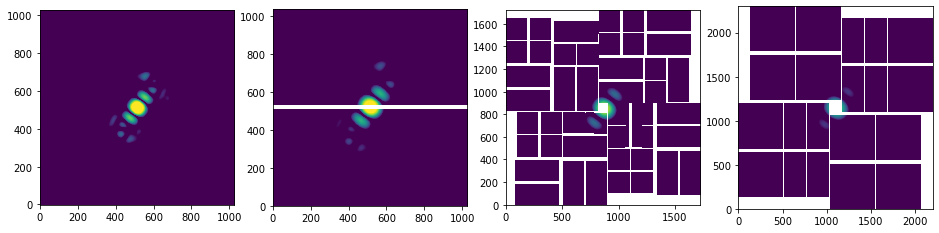

In [4]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16,4))

norm = matplotlib.colors.LogNorm(vmin=1, vmax=0.4*images['PnCCD'].max())
for ax,key in zip([ax1,ax2,ax3,ax4],['SimpleSquare','PnCCD','CsPad','Jungfrau']):
    im = ax.imshow(images[key].T, origin='lower', interpolation='None', norm=norm) 

In [5]:
# use intensity_field to generate masks to color gaps between panels
masks = dict()
for key in images.keys():
    masks[key] = np.ones_like(images[key])
    masks[key][images[key]==0] = 0

In [7]:
# compute photons
start_time = time.time()

photons = dict()
distance, pix_width = dict(), dict()

# non LCLS detector
n_pixels, det_size, det_dist = 1024, 0.08, 0.2
det = sk.SimpleSquareDetector(n_pixels, det_size, det_dist, beam=beam) 
distance['SimpleSquare'], pix_width['SimpleSquare'] = det.distance, det.pixel_width
photons['SimpleSquare'] = det.assemble_image_stack(det.get_photons(particle))
s_mags = det.pixel_distance_reciprocal

geom_paths = dict()
geom_paths['PnCCD'] = os.path.join(base_dir, "lcls/amo86615/PNCCD::CalibV1/Camp.0:pnCCD.1/geometry/0-end.data")
geom_paths['CsPad'] = "/cds/data/psdm/cxi/cxi04915/calib/CsPad::CalibV1/CxiDs2.0:Cspad.0/geometry/0-end.data"
geom_paths['Jungfrau'] = "/cds/data/psdm/cxi/cxilv9518/calib/Jungfrau::CalibV1/CxiDs1.0:Jungfrau.0/geometry/0-end.data"
geom_paths['Epix10k'] = os.path.join(base_dir, "lcls/xcsx35617/Epix10ka2M::CalibV1/XcsEndstation.0:Epix10ka2M.0/geometry/0-end.data")

for gkey in geom_paths.keys():        
    if 'PnCCD' in gkey:
        det = sk.PnccdDetector(geom = geom_paths[gkey], beam = beam)
        det.distance = 0.19
    elif 'CsPad' in gkey:
        det = sk.CsPadDetector(geom = geom_paths[gkey], beam = beam)
        det.distance = 0.48
    elif 'Jungfrau' in gkey:
        det = sk.JungfrauDetector(geom = geom_paths[gkey], beam = beam, cameraConfig="fixedMedium")
        det.distance = 0.42
    elif 'Epix10k' in gkey:
        det = sk.Epix10kDetector(geom = geom_paths[gkey], beam = beam, cameraConfig="fixedMedium")
        det.distance = 0.42
    else:
        print(f"Key error for {gkey}")
        
    distance[f'{gkey}'], pix_width[f'{gkey}'] = det.distance, det.pixel_width
    photons[f'{gkey}'] = det.assemble_image_stack(det.get_photons(particle))
            
print(f"Elapsed time is {(time.time() - start_time)/60.0}")

Elapsed time is 2.450648518403371


/cds/home/a/apeck/.local/lib/python3.7/site-packages/ipykernel/__main__.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


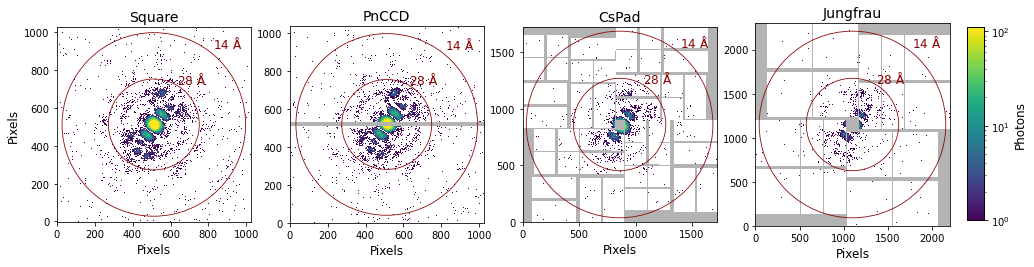

In [9]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16,4))

norm = matplotlib.colors.LogNorm(vmin=1, vmax=0.4*photons['SimpleSquare'].max())
for ax,key in zip([ax1,ax2,ax3,ax4],['SimpleSquare','PnCCD','CsPad','Jungfrau']):
    im = ax.imshow(photons[key].T, origin='lower', interpolation='None', norm=norm) 
    
    # set regions between panels to grey
    masked_data = masks[key].copy()
    masked_data = np.ma.masked_where(masked_data==1, masked_data)
    ax.imshow(masked_data.T, cmap=cm.gray, alpha=0.3, interpolation='None', origin='lower')
    
    ax.set_title("%s" %key, fontsize=14)
    if key == 'SimpleSquare':
        ax.set_title("Square", fontsize=14)
    
    # add diffraction rings
    center = 0.5*np.array(photons[key].T.shape)[::-1]
    s_start = s_mags.max() * 0.68
    steps = range(1,3)
    for i in steps:
        q = i*s_start/steps[-1]
        s = q/(2*beam.wavenumber)
        pix_rad = distance[key] * 2 * s * np.sqrt(1-s**2) / (1-2*s**2) / np.mean(pix_width[key])
        resolution = 1e10/q
        label_pos = 0.85*(1-0.03*i)

        ax.add_patch(Circle(center, pix_rad, edgecolor='darkred', fill=False, linewidth=0.8))
        ax.annotate("%i $\mathrm{\AA}$"%resolution, xy=(label_pos*pix_rad+center[0], label_pos*pix_rad+center[1]),
                               ha="center", va="bottom", color="darkred", fontsize=12)
        
    cbar_ax = f.add_axes([0.915, 0.17, 0.015, 0.67])
    cb = f.colorbar(im, cax=cbar_ax)
    cb.set_label("Photons", fontsize=12)
    
    if key == 'CsPad':
        ax.set_yticks(range(0,2000,500))
    ax.set_xlabel("Pixels", fontsize=12)
    if key == 'SimpleSquare':
        ax.set_ylabel("Pixels", fontsize=12)

f.savefig("/cds/home/a/apeck/exafel/skopi_figs/detector/detectors.png", dpi=300, bbox_inches='tight')

#### visualizing autoranging feature

In [10]:
from skopi.build_autoranging_frames import BuildAutoRangeFrames

def autorange_frame(img, det, beam):
    """
    Apply autoranging feature -- see notebook in examples folder.
    """
    tau = beam.get_photon_energy()/1000.
    dp_keV = np.expand_dims(img, axis=0) * tau # convert photons to keV
   
    I0width = 0.03
    I0min = 0
    I0max = 150000
    bauf = BuildAutoRangeFrames(det, I0width, I0min, I0max, dp_keV)
    bauf.makeFrame()
    calib_photons = bauf.frame / tau # convert keV to photons
    
    return calib_photons[0]


In [11]:
beam = sk.Beam(beam_file)
increase_factor = 5e4
beam.set_photons_per_pulse(increase_factor*beam.get_photons_per_pulse())

In [12]:
geom_file = os.path.join(base_dir, "lcls/xcsx35617/Epix10ka2M::CalibV1/XcsEndstation.0:Epix10ka2M.0/geometry/0-end.data")
det = sk.Epix10kDetector(geom = geom_file, beam = beam, cameraConfig="fixedMedium")
det.distance = 0.7

In [13]:
ar_images = dict()
ar_images['normal'] = det.get_intensity_field(particle)
ar_images['fixedMedium'] = autorange_frame(ar_images['normal'].copy(), det, beam)

det = sk.Epix10kDetector(geom = geom_file, beam = beam, cameraConfig="fixedLow")
det.distance = 0.7
ar_images['fixedLow'] = autorange_frame(ar_images['normal'].copy(), det, beam)

det = sk.Epix10kDetector(geom = geom_file, beam = beam, cameraConfig="highLow")
det.distance = 0.7
ar_images['highLow'] = autorange_frame(ar_images['normal'].copy(), det, beam)

Text(0.5, 1.0, 'High Low - difference map')

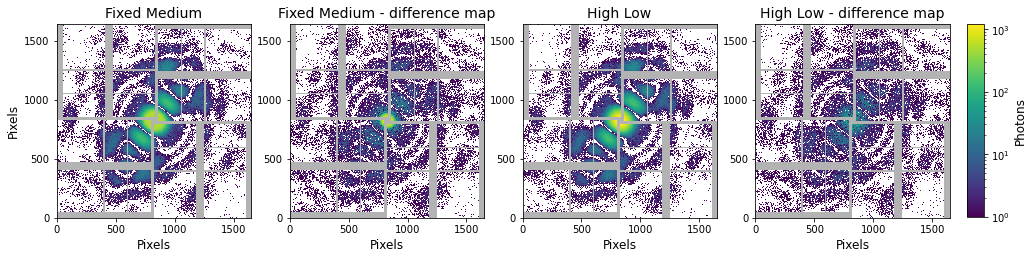

In [14]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4))

masked_data = det.assemble_image_stack(ar_images['normal']).T.copy()
masked_data = np.ma.masked_where(masked_data!=0, masked_data)

norm = matplotlib.colors.LogNorm(vmin=1, vmax=ar_images['normal'].max())
for ax,key in zip([ax1,ax3],['fixedMedium','highLow']):
    p_image = det.assemble_image_stack(det.add_quantization(ar_images[key])).T
    ax.imshow(p_image, origin='lower', interpolation='None', norm=norm)
    ax.imshow(masked_data, cmap=cm.gray, alpha=0.3, interpolation='None', origin='lower')

r_image = det.assemble_image_stack(det.add_quantization(ar_images['normal'])).T    
for ax,key in zip([ax2,ax4],['fixedMedium','highLow']):
    p_image = det.assemble_image_stack(det.add_quantization(ar_images[key])).T
    im = ax.imshow(np.abs(p_image - r_image), origin='lower', interpolation='None', norm=norm)
    ax.imshow(masked_data, cmap=cm.gray, alpha=0.3, interpolation='None', origin='lower')
    
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_yticks(range(0,2000,500))
    ax.set_xlabel("Pixels", fontsize=12)
ax1.set_ylabel("Pixels", fontsize=12)

cbar_ax = f.add_axes([0.915, 0.17, 0.015, 0.67])
cb = f.colorbar(im, cax=cbar_ax)
cb.set_label("Photons", fontsize=12)

ax1.set_title("Fixed Medium", fontsize=14)
ax2.set_title("Fixed Medium - difference map", fontsize=14)
ax3.set_title("High Low", fontsize=14)
ax4.set_title("High Low - difference map", fontsize=14)

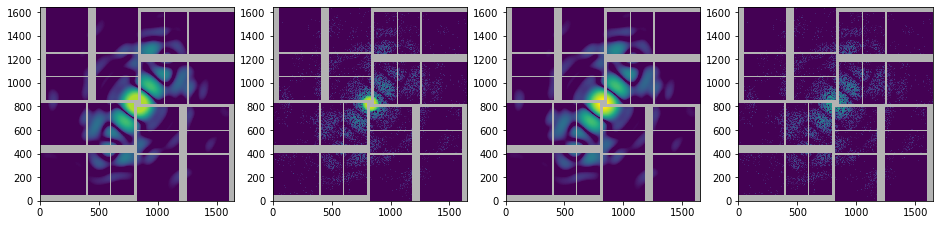

In [15]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4))

norm = matplotlib.colors.LogNorm(vmin=1, vmax=ar_images['normal'].max())
for ax,key in zip([ax1,ax3],['fixedMedium','highLow']):
    p_image = det.assemble_image_stack(ar_images[key]).T
    ax.imshow(p_image, origin='lower', interpolation='None', norm=norm)
    ax.imshow(masked_data, cmap=cm.gray, alpha=0.3, interpolation='None', origin='lower')

r_image = det.assemble_image_stack(det.add_quantization(ar_images['normal'])).T    
for ax,key in zip([ax2,ax4],['fixedMedium','highLow']):
    p_image = det.assemble_image_stack(ar_images[key]).T
    ax.imshow(np.abs(p_image - r_image), origin='lower', interpolation='None', norm=norm)
    ax.imshow(masked_data, cmap=cm.gray, alpha=0.3, interpolation='None', origin='lower')


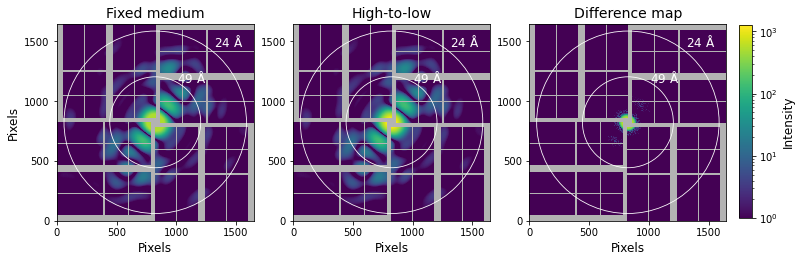

In [17]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

masked_data = det.assemble_image_stack(ar_images['normal']).T.copy()
masked_data = np.ma.masked_where(masked_data!=0, masked_data)
s_mags = det.pixel_distance_reciprocal

norm = matplotlib.colors.LogNorm(vmin=1, vmax=ar_images['highLow'].max())
for ax,key in zip([ax1,ax2],['fixedMedium','highLow']):
    p_image = det.assemble_image_stack(ar_images[key]).T
    ax.imshow(p_image, origin='lower', interpolation='None', norm=norm)
    ax.imshow(masked_data, cmap=cm.gray, alpha=0.3, interpolation='None', origin='lower')

p_image = det.assemble_image_stack(ar_images['fixedMedium']).T
r_image = det.assemble_image_stack(ar_images['highLow']).T
im = ax3.imshow(np.abs(p_image - r_image), origin='lower', interpolation='None', norm=norm)
ax3.imshow(masked_data, cmap=cm.gray, alpha=0.3, interpolation='None', origin='lower')
    
for ax in [ax1,ax2,ax3]:
    ax.set_yticks(range(0,2000,500))
    ax.set_xlabel("Pixels", fontsize=12)
    
    # add diffraction rings
    center = 0.5*np.array(det.assemble_image_stack(ar_images['normal']).T.shape)[::-1]
    s_start = s_mags.max()*0.68
    steps = range(1,3)
    for i in steps:
        q = i*s_start/steps[-1]
        s = q/(2*beam.wavenumber)
        pix_rad = det.distance * 2 * s * np.sqrt(1-s**2) / (1-2*s**2) / np.mean(det.pixel_width)
        resolution = 1e10/q

        ax.add_patch(Circle(center, pix_rad, edgecolor='white', fill=False, linewidth=0.8))
        ax.annotate("%i $\mathrm{\AA}$"%resolution, xy=(0.8*pix_rad+center[0], 0.8*pix_rad+center[1]),
                               ha="center", va="bottom", color="white", fontsize=12)

    
ax1.set_ylabel("Pixels", fontsize=12)

cbar_ax = f.add_axes([0.915, 0.17, 0.015, 0.67])
cb = f.colorbar(im, cax=cbar_ax)
cb.set_label("Intensity", fontsize=12)

ax1.set_title("Fixed medium", fontsize=14)
ax2.set_title("High-to-low", fontsize=14)
ax3.set_title("Difference map", fontsize=14)

f.savefig("/cds/home/a/apeck/exafel/skopi_figs/detector/autoranging.png", dpi=300, bbox_inches='tight')

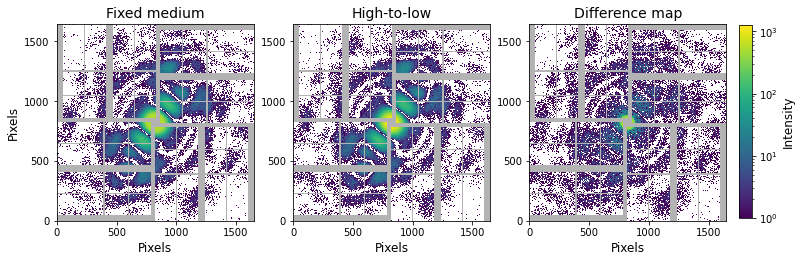

In [18]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

masked_data = det.assemble_image_stack(ar_images['normal']).T.copy()
masked_data = np.ma.masked_where(masked_data!=0, masked_data)

norm = matplotlib.colors.LogNorm(vmin=1, vmax=ar_images['highLow'].max())
for ax,key in zip([ax1,ax2],['fixedMedium','highLow']):
    p_image = det.assemble_image_stack(det.add_quantization(ar_images[key])).T
    ax.imshow(p_image, origin='lower', interpolation='None', norm=norm)
    ax.imshow(masked_data, cmap=cm.gray, alpha=0.3, interpolation='None', origin='lower')

p_image = det.assemble_image_stack(det.add_quantization(ar_images['fixedMedium'])).T
r_image = det.assemble_image_stack(det.add_quantization(ar_images['highLow'])).T
im = ax3.imshow(np.abs(p_image - r_image), origin='lower', interpolation='None', norm=norm)
ax3.imshow(masked_data, cmap=cm.gray, alpha=0.3, interpolation='None', origin='lower')
    
for ax in [ax1,ax2,ax3]:
    ax.set_yticks(range(0,2000,500))
    ax.set_xlabel("Pixels", fontsize=12)
ax1.set_ylabel("Pixels", fontsize=12)

cbar_ax = f.add_axes([0.915, 0.17, 0.015, 0.67])
cb = f.colorbar(im, cax=cbar_ax)
cb.set_label("Intensity", fontsize=12)

ax1.set_title("Fixed medium", fontsize=14)
ax2.set_title("High-to-low", fontsize=14)
ax3.set_title("Difference map", fontsize=14)

f.savefig("/cds/home/a/apeck/exafel/skopi_figs/detector/autoranging_q.png", dpi=300, bbox_inches='tight')

#### fluctuating darks

In [19]:
geom = "/cds/data/psdm/cxi/cxic04616/calib/CsPad::CalibV1/CxiDs1.0:Cspad.0/geometry/0-end.data"
det = sk.CsPadDetector(geom_file)
#darks = det.add_dark_noise(4, det_shape=True, mask_neg=False)

Pedestals and/or XTC data are unavailable.


In [22]:
#np.save("/cds/home/a/apeck/exafel/skopi_figs/darks.npy", darks)
darks = np.load("/cds/home/a/apeck/exafel/skopi_figs/test_detector/darks.npy")

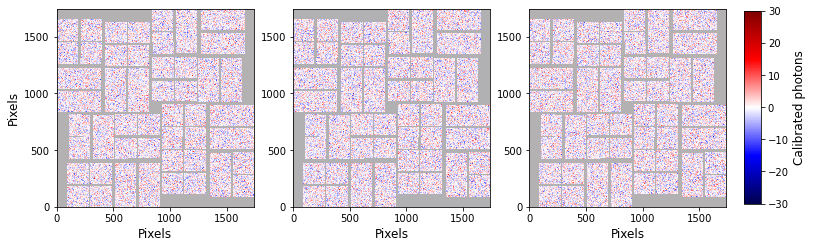

In [23]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

key = 'CsPad'
masked_data = darks[0].copy()
masked_data = np.ma.masked_where(masked_data!=0, masked_data)

for i,ax in enumerate([ax1,ax2,ax3]):
    im = ax.imshow(darks[i].T, vmin=-30, vmax=30, cmap='seismic', interpolation='None', origin='lower')
    ax.imshow(masked_data.T, cmap=cm.gray, alpha=0.3, interpolation='None', origin='lower')
    ax.set_yticks(range(0,2000,500))
    ax.set_xlabel("Pixels", fontsize=12)
    
ax1.set_ylabel("Pixels", fontsize=12)
cbar_ax = f.add_axes([0.92, 0.17, 0.02, 0.67])
cb = f.colorbar(im, cax=cbar_ax)
cb.set_label("Calibrated photons", fontsize=12)

f.savefig("/cds/home/a/apeck/exafel/skopi_figs/detector/darks.png", dpi=300, bbox_inches='tight')

#### beam miscentering

In [38]:
# regenerate beam object with desired fluence
beam = sk.Beam(beam_file)
increase_factor = 1e3
beam.set_photons_per_pulse(increase_factor*beam.get_photons_per_pulse())

# use a simplesquare detector
n_pixels, det_size, det_dist = 1024, 0.08, 0.2
det = sk.SimpleSquareDetector(n_pixels, det_size, det_dist, beam=beam) 

orientations = sk.get_random_quat(1)
particle.rotate(orientations[0])

In [39]:
centered = det.get_photons(particle)
xd, yd = det.offset_beam_center(sigma=2)
jittered = det.get_photons(particle)
print(xd, yd)

3.4756976866747533 2.934649703382226


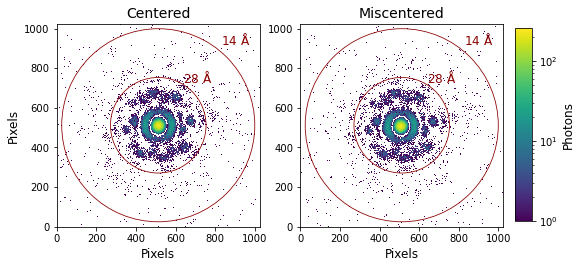

In [40]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

norm = matplotlib.colors.LogNorm(vmin=1, vmax=centered.max())
diffmap = centered - jittered
for ax,kmap in zip([ax1,ax2],[centered, jittered]):
    im = ax.imshow(kmap[0].T, interpolation='None', origin='lower', norm=norm)
    
    # add diffraction rings
    center = 0.5*np.array(kmap[0].T.shape)[::-1]
    s_start = det.pixel_distance_reciprocal.max() * 0.68
    steps = range(1,3)
    for i in steps:
        q = i*s_start/steps[-1]
        s = q/(2*beam.wavenumber)
        pix_rad = det.distance * 2 * s * np.sqrt(1-s**2) / (1-2*s**2) / np.mean(det.pixel_width)
        resolution = 1e10/q
        label_pos = 0.85*(1-0.03*i)

        ax.add_patch(Circle(center, pix_rad, edgecolor='darkred', fill=False, linewidth=0.8))
        ax.annotate("%i $\mathrm{\AA}$"%resolution, xy=(label_pos*pix_rad+center[0], label_pos*pix_rad+center[1]),
                               ha="center", va="bottom", color="darkred", fontsize=12)

    
ax1.set_ylabel("Pixels", fontsize=12)
cbar_ax = f.add_axes([0.92, 0.17, 0.03, 0.67])
cb = f.colorbar(im, cax=cbar_ax)
cb.set_label("Photons", fontsize=12)

for ax in [ax1,ax2]:
    ax.set_xlabel("Pixels", fontsize=12)
    
ax1.set_title("Centered", fontsize=14)
ax2.set_title("Miscentered", fontsize=14)

f.savefig("/cds/home/a/apeck/exafel/skopi_figs/detector/beam_jitter1.png", dpi=300, bbox_inches='tight')

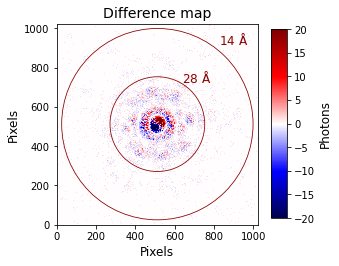

In [41]:
f, ax1 = plt.subplots(figsize=(3.7,3.7))

im = ax1.imshow(centered[0].T - jittered[0].T, interpolation='None', origin='lower', cmap='seismic', vmin=-20, vmax=20)
ax1.set_title("Difference map", fontsize=14)

ax1.set_xlabel("Pixels", fontsize=12)
ax1.set_ylabel("Pixels", fontsize=12)
cbar_ax = f.add_axes([0.94, 0.15, 0.06, 0.71])
cb = f.colorbar(im, cax=cbar_ax)
cb.set_label("Photons", fontsize=12)

center = 0.5*np.array(centered[0].T.shape)[::-1]
s_start = det.pixel_distance_reciprocal.max() * 0.68
steps = range(1,3)
for i in steps:
    q = i*s_start/steps[-1]
    s = q/(2*beam.wavenumber)
    pix_rad = det.distance * 2 * s * np.sqrt(1-s**2) / (1-2*s**2) / np.mean(det.pixel_width)
    resolution = 1e10/q
    label_pos = 0.85*(1-0.03*i)

    ax1.add_patch(Circle(center, pix_rad, edgecolor='darkred', fill=False, linewidth=0.8))
    ax1.annotate("%i $\mathrm{\AA}$"%resolution, xy=(label_pos*pix_rad+center[0], label_pos*pix_rad+center[1]),
                               ha="center", va="bottom", color="darkred", fontsize=12)

f.savefig("/cds/home/a/apeck/exafel/skopi_figs/detector/beam_jitter2.png", dpi=300, bbox_inches='tight')

#### sloped background

In [32]:
orientation = sk.get_random_quat(1)
orientations = np.tile(orientation, 2).reshape(2,4)

exp = sk.SPIExperiment(det, beam, particle)
exp.set_orientations(orientations)

In [33]:
# arbitrary sloped background
x = np.zeros(det.shape)
y = np.square(det.pixel_index_map[0][:,:,0]) + np.square(det.pixel_index_map[0][:,:,1])
y = np.expand_dims(y, axis=0).astype(float)
y = 3.0 * y / y.max() * 5e-2

img_clean = exp.generate_image_stack(return_intensities=False)
img_sloped = exp.generate_image_stack(return_intensities=False, noise={'sloped':y})

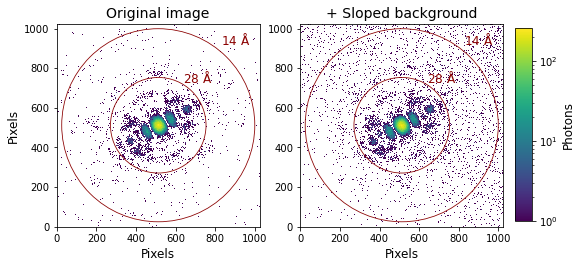

In [42]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

norm = matplotlib.colors.LogNorm(vmin=1, vmax=centered.max())
diffmap = centered - jittered
for ax,kmap in zip([ax1,ax2],[img_clean, img_sloped]):
    im = ax.imshow(kmap[0].T, interpolation='None', origin='lower', norm=norm)
    
    # add diffraction rings
    center = 0.5*np.array(kmap[0].T.shape)[::-1]
    s_start = det.pixel_distance_reciprocal.max() * 0.68
    steps = range(1,3)
    for i in steps:
        q = i*s_start/steps[-1]
        s = q/(2*beam.wavenumber)
        pix_rad = det.distance * 2 * s * np.sqrt(1-s**2) / (1-2*s**2) / np.mean(det.pixel_width)
        resolution = 1e10/q
        label_pos = 0.85*(1-0.03*i)

        ax.add_patch(Circle(center, pix_rad, edgecolor='darkred', fill=False, linewidth=0.8))
        ax.annotate("%i $\mathrm{\AA}$"%resolution, xy=(label_pos*pix_rad+center[0], label_pos*pix_rad+center[1]),
                               ha="center", va="bottom", color="darkred", fontsize=12)

    
ax1.set_ylabel("Pixels", fontsize=12)
cbar_ax = f.add_axes([0.92, 0.17, 0.03, 0.67])
cb = f.colorbar(im, cax=cbar_ax)
cb.set_label("Photons", fontsize=12)

for ax in [ax1,ax2]:
    ax.set_xlabel("Pixels", fontsize=12)
    
ax1.set_title("Original image", fontsize=14)
ax2.set_title("+ Sloped background", fontsize=14)

f.savefig("/cds/home/a/apeck/exafel/skopi_figs/detector/sloped1.png", dpi=300, bbox_inches='tight')

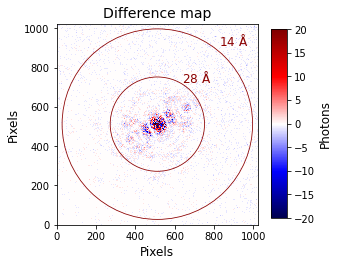

In [36]:
f, ax1 = plt.subplots(figsize=(3.7,3.7))

im = ax1.imshow(img_clean[0].T - img_sloped[0].T, interpolation='None', origin='lower', cmap='seismic', vmin=-20, vmax=20)
ax1.set_title("Difference map", fontsize=14)

ax1.set_xlabel("Pixels", fontsize=12)
ax1.set_ylabel("Pixels", fontsize=12)
cbar_ax = f.add_axes([0.94, 0.15, 0.06, 0.71])
cb = f.colorbar(im, cax=cbar_ax)
cb.set_label("Photons", fontsize=12)

center = 0.5*np.array(centered[0].T.shape)[::-1]
s_start = det.pixel_distance_reciprocal.max() * 0.68
steps = range(1,3)
for i in steps:
    q = i*s_start/steps[-1]
    s = q/(2*beam.wavenumber)
    pix_rad = det.distance * 2 * s * np.sqrt(1-s**2) / (1-2*s**2) / np.mean(det.pixel_width)
    resolution = 1e10/q
    label_pos = 0.85*(1-0.03*i)

    ax1.add_patch(Circle(center, pix_rad, edgecolor='darkred', fill=False, linewidth=0.8))
    ax1.annotate("%i $\mathrm{\AA}$"%resolution, xy=(label_pos*pix_rad+center[0], label_pos*pix_rad+center[1]),
                               ha="center", va="bottom", color="darkred", fontsize=12)

f.savefig("/cds/home/a/apeck/exafel/skopi_figs/detector/sloped2.png", dpi=300, bbox_inches='tight')